<a href="https://colab.research.google.com/github/OmarAhmedElwekeil/Flowers-CNN/blob/main/Flowers_recogniction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [15]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alxmamaev/flowers-recognition")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/flowers-recognition


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range = 30,
                             width_shift_range = .1,
                             height_shift_range = .1,
                             shear_range = .1,
                             zoom_range = .3,
                             horizontal_flip = True,
                             validation_split = .2,
                             fill_mode = 'nearest')

In [19]:
rain = datagen.flow_from_directory(
    '/kaggle/input/flowers-recognition',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

Found 3454 images belonging to 1 classes.


In [20]:
val = datagen.flow_from_directory(
    '/kaggle/input/flowers-recognition',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 863 images belonging to 1 classes.


In [32]:
model = Sequential([Input(shape=(128, 128, 3)),
                    Conv2D(32, (3, 3), activation='relu', padding='same'),
                    MaxPooling2D(2,2),
                    Conv2D(32, (3, 3), activation='relu', padding='same'),
                    MaxPooling2D(2, 2),
                    Flatten(),
                    Dense(32, activation='relu'),
                    Dense(16, activation='relu'),
                    Dense(100, activation='softmax')])

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │     1,048,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │         1,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,980 (4.05 MB)

 Trainable params: 1,060,980 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = model.fit(rain, epochs=10, validation_data=val)

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 343ms/step - accuracy: 0.6713 - loss: 1.1001 - val_accuracy: 1.0000 - val_loss: 4.2786e-06
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 29s 252ms/step - accuracy: 1.0000 - loss: 3.4114e-06 - val_accuracy: 1.0000 - val_loss: 1.9522e-06
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 27s 253ms/step - accuracy: 1.0000 - loss: 1.8939e-06 - val_accuracy: 1.0000 - val_loss: 8.1368e-07
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 29s 274ms/step - accuracy: 1.0000 - loss: 2.0678e-06 - val_accuracy: 1.0000 - val_loss: 9.8140e-07
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 32s 299ms/step - accuracy: 1.0000 - loss: 6.7079e-07 - val_accuracy: 1.0000 - val_loss: 4.0733e-07
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 27s 246ms/step - accuracy: 1.0000 - loss: 3.1482e-06 - val_accuracy: 1.0000 - val_loss: 7.7950e-07
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 42s 252ms/step - accuracy: 1.0000 - loss: 7.3924e-07 - val_accuracy: 1.0000 - val_loss: 3.1120e-07
Epoch 8/10
108/108 ━━━━━━━━━━━━

In [36]:
loss, accuracy = model.evaluate(val)
print("Loss:", loss)
print("Accuracy:", accuracy)

27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 1.0000 - loss: 5.7005e-08
Loss: 7.500591436837567e-08
Accuracy: 1.0


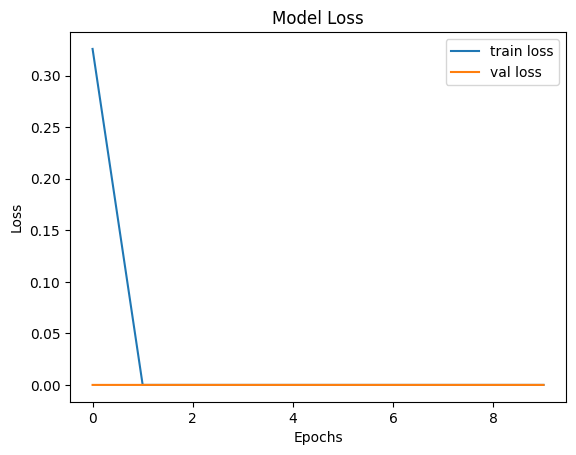

In [37]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()